In [1]:
import pandas as pd

In [22]:
df1 = pd.DataFrame({'Name': ['Aman', 'Joy', 'Rashmi', 'Saif'],
                    'Age': ['34', '31', '22', '33'],
                    'Gender': ['M', 'M', 'F', 'M']}
                  )

df2 = pd.DataFrame({'Name': ['Akhil', 'Asha', 'Preeti'],
                    'Age': ['31', '22', '23'],
                    'Gender': ['M', 'F', 'F']}
                  )

In [20]:
df1

,Name,Age,Gender
0,Aman,34,M
3,Saif,33,M


In [19]:
df1.drop([1,2], axis = 0, inplace=True)

In [4]:
df2

,Name,Age,Gender
0,Akhil,31,M
1,Asha,22,F
2,Preeti,23,F


In [23]:
batch1_dict = {
        'Id': ['100', '101', '102', '103', '104'],
        'Income': ["20k", '30k', '50k', '40k', '60k'],
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Male']}

In [24]:
batch1_df = pd.DataFrame(batch1_dict)
batch1_df

,Id,Income,Gender
0,100,20k,Male
1,101,30k,Female
2,102,50k,Male
3,103,40k,Female
4,104,60k,Male


In [25]:
batch2_dict = {
        'Id': ['200', '201', '202', '203', '204'],
        'Income': ["100k", '130k', '150k', '140k', '160k'],
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Male']}

In [26]:
batch2_df = pd.DataFrame(batch2_dict)
batch2_df

,Id,Income,Gender
0,200,100k,Male
1,201,130k,Female
2,202,150k,Male
3,203,140k,Female
4,204,160k,Male


In [27]:
external_data = {
        'id': ['100', '101', '102', '103', '104','200', '202', '202', '203', '204'],
        'Married': ["Yes", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No"]}

In [28]:
external_df = pd.DataFrame(external_data)
external_df

,id,Married
0,100,Yes
1,101,No
2,102,No
3,103,Yes
4,104,Yes
5,200,No
6,202,Yes
7,202,No
8,203,No
9,204,No


To simply concatenate the DataFrames along the row you can use the concat() function in pandas. You will have to pass the names of the DataFrames in a list as the argument to the concat() function:

In [32]:
df_row = pd.concat([batch1_df, batch2_df], axis= 0)

df_row

,Id,Income,Gender
0,100,20k,Male
1,101,30k,Female
2,102,50k,Male
3,103,40k,Female
4,104,60k,Male
0,200,100k,Male
1,201,130k,Female
2,202,150k,Male
3,203,140k,Female
4,204,160k,Male


In [30]:
# It concatenates along the rows
df4 = batch1_df.append(batch2_df)
df4

,Id,Income,Gender
0,100,20k,Male
1,101,30k,Female
2,102,50k,Male
3,103,40k,Female
4,104,60k,Male
0,200,100k,Male
1,201,130k,Female
2,202,150k,Male
3,203,140k,Female
4,204,160k,Male


To concatenate DataFrames along column, you can specify the axis parameter as 1

In [17]:
df_col = pd.concat([batch1_df, batch2_df], axis=1)

df_col

,Id,Income,Gender,Id,Income,Gender
0,100,20k,Male,200,100k,Male
1,101,30k,Female,201,130k,Female
2,102,50k,Male,202,150k,Male
3,103,40k,Female,203,140k,Female
4,104,60k,Male,204,160k,Male


In [19]:
batch2_df

,Id,Income,Gender
0,200,100k,Male
1,201,130k,Female
2,202,150k,Male
3,203,140k,Female
4,204,160k,Male


In [34]:
batch2_ext = {
        'Id': ['200', '201',"301","304"],
        'Dependents': ["1", '3',"2","0"]}

batch2ext_df = pd.DataFrame(batch2_ext)
batch2ext_df

,Id,Dependents
0,200,1
1,201,3
2,301,2
3,304,0


In [22]:
df_col = pd.concat([batch2_df, batch2ext_df], axis=1)

df_col

,Id,Income,Gender,Id,Dependents
0,200,100k,Male,200,1
1,201,130k,Female,201,3
2,202,150k,Male,301,2
3,203,140k,Female,304,0
4,204,160k,Male,NaN,NaN


In [ ]:
batch1_df

## Merge DataFrames

Two DataFrames might hold different kinds of information about the same entity and linked by some common feature/column. To join these DataFrames, pandas provides multiple functions like concat(), merge() , join(), etc.  

You can join DataFrames df_row (which you created by concatenating df1 and df2 along the row) and df3 on the common column (or key) id. To do so, pass the names of the DataFrames and an additional argument on as the name of the common column, here id, to the merge() function:

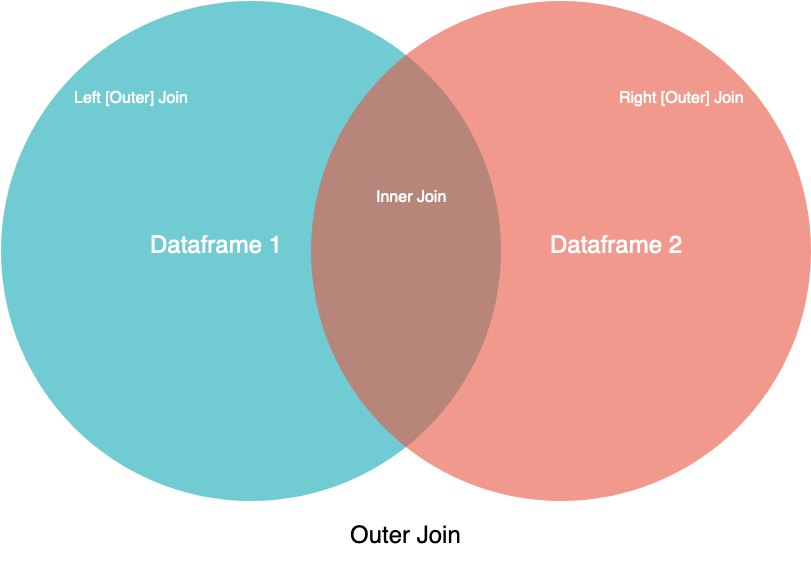

## Join DataFrames

Full Outer Join   


The FULL OUTER JOIN combines the results of both the left and the right outer joins. The joined DataFrame will contain all records from both the DataFrames and fill in NaNs for missing matches on either side. You can perform a full outer join by specifying the how argument as outer in the merge() function:

In [35]:
batch2_df

,Id,Income,Gender
0,200,100k,Male
1,201,130k,Female
2,202,150k,Male
3,203,140k,Female
4,204,160k,Male


In [36]:
batch2ext_df

,Id,Dependents
0,200,1
1,201,3
2,301,2
3,304,0


You can notice that the resulting DataFrame had all the entries from both the tables with NaN values for missing matches on either side. 

Inner Join  

The INNER JOIN produces only the set of records that match in both DataFrame A and DataFrame B. You have to pass inner in the how argument of merge() function to do inner join:   

In [39]:
df_inner = pd.merge(batch2_df, batch2ext_df, on='Id', how='inner')

df_inner

,Id,Income,Gender,Dependents
0,200,100k,Male,1
1,201,130k,Female,3


Right Join   

The RIGHT JOIN produces a complete set of records from DataFrame B (right DataFrame), with the matching records (where available) in DataFrame A (left DataFrame). If there is no match, the right side will contain null. You have to pass right in the how argument of merge() function to do right join:

In [27]:
df_right = pd.merge(batch2_df, batch2ext_df, on='Id', how='right')

df_right

,Id,Income,Gender,Dependents
0,200,100k,Male,1
1,201,130k,Female,3
2,301,NaN,NaN,2
3,304,NaN,NaN,0


Left Join   

The LEFT JOIN produces a complete set of records from DataFrame A (left DataFrame), with the matching records (where available) in DataFrame B (right DataFrame). If there is no match, the left side will contain null. You have to pass left in the how argument of merge() function to do left join:

In [29]:
df_left = pd.merge(batch2_df, batch2ext_df, on='Id', how='left')

df_left

,Id,Income,Gender,Dependents
0,200,100k,Male,1
1,201,130k,Female,3
2,202,150k,Male,NaN
3,203,140k,Female,NaN
4,204,160k,Male,NaN


In [28]:
df_outer = pd.merge(batch2_df,batch2ext_df, on='Id', how='outer')

df_outer

,Id,Income,Gender,Dependents
0,200,100k,Male,1
1,201,130k,Female,3
2,202,150k,Male,NaN
3,203,140k,Female,NaN
4,204,160k,Male,NaN
5,301,NaN,NaN,2
6,304,NaN,NaN,0


While merge() is a module function, .join() is an object function that lives on your DataFrame. This enables you to specify only one DataFrame, which will join the DataFrame you call .join() on.

Under the hood, .join() uses merge(), but it provides a more efficient way to join DataFrames than a fully specified merge() call.

# Concatenate, Merge, Join

These functions are used to combine multiple dataframes. It is important to understand their usage.

Here's a quick summary:
- **merge()** for combining data on common columns or indices
- **.join()** for combining data on a key column or an index
- **concat()** for combining DataFrames across rows or columns


# What is a Join Operation?
Join is a common database operation which combines data from two files, data sources, tables, views, or query outputs based on a given condition.

## Merge
Concatenation is a process of joining of the object along an axis, with set logic applied to other axes, if any (because a series doesn’t have any other axes). These are the main parameters involved in pandas concatenation- object, axis, handling of other axes, and keys.


## Join
Concatenation is a process of joining of the object along an axis, with set logic applied to other axes, if any (because a series doesn’t have any other axes). These are the main parameters involved in pandas concatenation- object, axis, handling of other axes, and keys.


## Concatenate
Concatenation is a process of joining of the object along an axis, with set logic applied to other axes, if any (because a series doesn’t have any other axes). These are the main parameters involved in pandas concatenation- object, axis, handling of other axes, and keys.


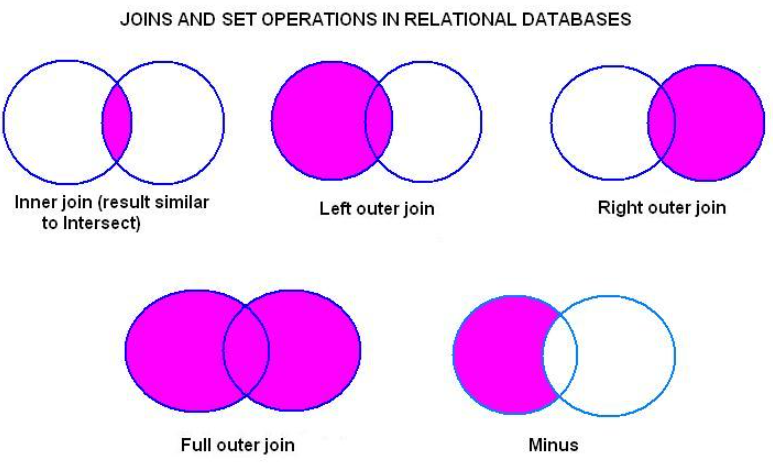

# Pivot Table

A pivot table is a data summarization tool that is used in the context of data processing. Pivot tables are used to summarize, sort, reorganize, group, count, total or average data stored in a database. It allows its users to transform columns into rows and rows into columns. It allows grouping by any data field. Pivot tables are the perfect solution when you need to summarize and analyze large amounts of data. 

We will create a pivot table on **Salary** And compare how marks in multiple subject are correlated to the salary.

### Quick Task: Talk like a Data Scientist 
Look at the next few outputs, analyze them, try to find pivot tables with multiple attributes and aggregate functions. Your task is to write a one-line summary about your biggest finding in the dataset.


# Grouping and Summarising Dataframes

Grouping and aggregation are some of the most frequently used operations in data analysis, especially while doing exploratory data analysis (EDA), where comparing summary statistics across groups of data is common.

For e.g., in the retail sales data we are working with, you may want to compare the average sales of various regions, or compare the total profit of two customer segments. 

Grouping analysis can be thought of as having three parts:
1. **Splitting** the data into groups (e.g. groups of customer segments, product categories, etc.)
2. **Applying** a function to each group (e.g. mean or total sales of each customer segment)
3. **Combining** the results into a data structure showing the summary statistics

The general syntax is ```pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', ...)```.
* ```data``` is a dataframe
* ```values``` contains the column to aggregate
* ```index``` is the row in the pivot table
* ```columns``` contains the columns you want in the pivot table
* ```aggfunc``` is the aggregate function

In [40]:
df=pd.read_excel("loandata.xlsx")

In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


In [44]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [32]:
df.pivot_table(values="ApplicantIncome",index="Gender",aggfunc='mean')

,ApplicantIncome
Gender,
Female,4643.473214
Male,5446.460123


In [46]:
df.pivot_table(values="ApplicantIncome",index=["Gender","Education","Self_Employed"],columns = "Married",aggfunc='mean')

Married                                      No           Yes
Gender Education    Self_Employed                            
Female Graduate     No              4147.811321   4369.523810
                    Yes             6552.625000  12161.333333
       Not Graduate No              2956.200000   2798.500000
                    Yes            13098.333333   7142.000000
Male   Graduate     No              5218.098765   5736.457399
                    Yes             9013.666667   7468.210526
       Not Graduate No              3609.760000   3512.309859
                    Yes             3801.250000   4530.777778

In [43]:
df.pivot_table(values=["ApplicantIncome","Credit_History"],index="Gender",columns = "Married",aggfunc='mean')

ApplicantIncome              Credit_History          
Married              No          Yes             No       Yes
Gender                                                       
Female      4503.787500  4829.645161       0.821918  0.851852
Male        5236.146154  5529.540616       0.845528  0.846626